`pulsar.csv` ([source](https://archive.ics.uci.edu/ml/datasets/HTRU2)) contains statistics from two types of signal from pulsar candidates: integrated profile and dispersion-measure signal-to-noise curve.

In [1]:
import pandas as pd

data = pd.read_csv("pulsar.csv")
display(data)
X = data.iloc[:,:8] # Predictors: Signal statistics.
y = data.iloc[:,8] # Target: pulsar (1) vs. non-pulsar (0).

from sklearn.model_selection import StratifiedShuffleSplit

# Split.
split = StratifiedShuffleSplit(n_splits=1, test_size=1/3, random_state=0)
for train_idx, test_idx in split.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

,IP_Mean,IP_SD,IP_Kurt,IP_Skew,DMSNR_Mean,DMSNR_SD,DMSNR_Kurt,DMSNR_Skew,Pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


For `max_depth` ranging from 1 to 20, fit decision tree classifiers to the training data. Use `random_state=0`. Plot training vs. test accuracy.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
training_accuracy_score = []
for depth in range(1,20):
    clf = DecisionTreeClassifier(max_depth=depth,random_state=0)
    clf.fit(X_train,y_train)
    y_train_pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train, y_train_pred)
    training_accuracy_score.append(accuracy)

In [4]:
test_accuracy_score = []
for depth in range(1,20):
    clf = DecisionTreeClassifier(max_depth=depth,random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracy_score.append(accuracy)

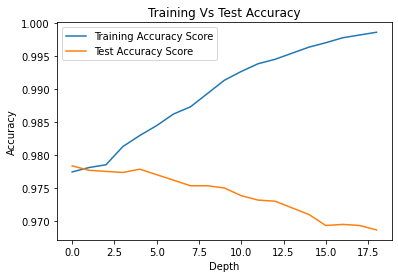

In [5]:
import matplotlib.pyplot as plt
plt.plot(training_accuracy_score,label="Training Accuracy Score")
plt.plot(test_accuracy_score,label="Test Accuracy Score")
plt.title("Training Vs Test Accuracy")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#plt.plot(training_accuracy_score,test_accuracy_score)

What trend do you observe in the training and test accuracies as `max_depth` increases? Explain the trend.

### Answer:
From the plot abover, we have 2 lines plotted, the blue line represents the training accuracy and the orange line represents the testing accuracy. The training accuracy trend is it increases as the max depth increases, this is beacuse there is no new unseen data feeded to the model and with increase in the max depth more splits happen which leads to overfitting the data, therefore when the training data is applied the model acts accurately as there is no new data . On other hand, the testing accuracy decreases with increase in max depth because the model is overfitting with increase in max depth and is not accurately able to classify the new unseen data. 

For `n_estimators` ranging from 1 to 101 with step size 10, fit random forest classifiers to the training data. Use `random_state=0` and `max_depth=3`. Plot training vs. test accuracy.

In [6]:
from sklearn.ensemble import RandomForestClassifier
training_accuracy_score = []
n_est=[]
for n_estimators in range(1,100,10):
    clf = RandomForestClassifier(n_estimators=n_estimators,max_depth=3,random_state=0)
    clf.fit(X_train,y_train)
    y_train_pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train, y_train_pred)
    training_accuracy_score.append(accuracy)
    n_est.append(n_estimators)

test_accuracy_score = []
for n_estimators in range(1,100,10):
    clf = RandomForestClassifier(n_estimators=n_estimators,max_depth=3,random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracy_score.append(accuracy)
    
    

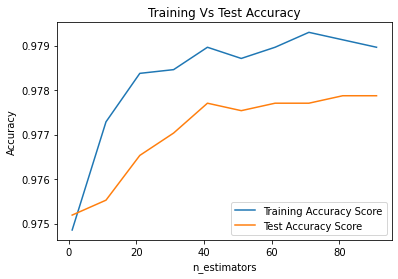

In [7]:
plt.plot(n_est,training_accuracy_score,label="Training Accuracy Score")
plt.plot(n_est,test_accuracy_score,label="Test Accuracy Score")
plt.title("Training Vs Test Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()

What trend do you observe in the training and test accuracies as `n_estimators` increases? Explain the trend.

### Answer:
We can see from the plot above that as n_estimators increases, both training accuracy and test accuracy improve as well. n_estimators parameter is the number of trees the random forest consist of. The plot's trend is as it is because learning from data is improved as the number of trees increases.It translates to more trees, more prediction, better output aggregation, and more accurate prediction. The test data is unseen, which slightly lowers accuracy, which is why the training accuracy results are considerably better as there is no new data being fed.